**NOTE : Permformance metric is 95th Percentile on Order Delivery time should be less than 31 mins.**


In [1]:
# Connect to Drive folder

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as st
import matplotlib as mpl
import missingno as msno
from scipy import stats

In [3]:
# Load the dataset from Drive folder

df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/INNOMATICS RESEARCH LAB INTERNSHIP/DATA ANALYSIS/P14_DOMINOS_ANALYSIS/dominos_data.csv')

In [4]:
# View first 5 rows of the DataFrame

df.head()

,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056


In [5]:
# View information about a DataFrame including the index dtype and columns, non-null values and memory usage

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            15000 non-null  int64 
 1   order_placed_at     15000 non-null  object
 2   order_delivered_at  15000 non-null  object
dtypes: int64(1), object(2)
memory usage: 351.7+ KB


In [6]:
# View descriptive statistics of the DataFrame

df.describe()

,order_id
count,1.500000e+04
mean,1.530610e+06
std,4.330271e+03
min,1.523111e+06
25%,1.526861e+06
50%,1.530610e+06
75%,1.534360e+06
max,1.538110e+06


In [7]:
# View shape of the DataFrame

df.shape

(15000, 3)

In [8]:
# Counting number of duplicate rows

duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 3)


In [9]:
# View columns of DataFrame

df.columns

Index(['order_id', 'order_placed_at', 'order_delivered_at'], dtype='object')

In [10]:
# Print numerical columns of DataFrame

numeric_features = df.select_dtypes(include=[np.number])
numeric_features.columns

Index(['order_id'], dtype='object')

In [11]:
# Print categorical columns of DataFrame

categorical_features = df.select_dtypes(include=[np.object])
categorical_features.columns

<ipython-input-11-886643fe52e6>:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features = df.select_dtypes(include=[np.object])


Index(['order_placed_at', 'order_delivered_at'], dtype='object')

In [12]:
# Total number of null entries in each column

df.isnull().sum()

order_id              0
order_placed_at       0
order_delivered_at    0
dtype: int64

In [13]:
# Convert the order_placed_at and order_delivered_at columns to datetime format

df['order_placed_at'] = pd.to_datetime(df['order_placed_at'])
df['order_delivered_at'] = pd.to_datetime(df['order_delivered_at'])


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            15000 non-null  int64         
 1   order_placed_at     15000 non-null  datetime64[ns]
 2   order_delivered_at  15000 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1)
memory usage: 351.7 KB


In [15]:
# Day of month of order

df['order_placed_at'].dt.day

0         1
1         1
2         1
3         1
4         1
         ..
14995    27
14996    27
14997    27
14998    27
14999    27
Name: order_placed_at, Length: 15000, dtype: int64

In [16]:
# Day of week of order [0-6]

df['order_placed_at'].dt.dayofweek

0        2
1        2
2        2
3        2
4        2
        ..
14995    0
14996    0
14997    0
14998    0
14999    0
Name: order_placed_at, Length: 15000, dtype: int64

In [17]:
# Month of order

df['order_placed_at'].dt.month

0        3
1        3
2        3
3        3
4        3
        ..
14995    3
14996    3
14997    3
14998    3
14999    3
Name: order_placed_at, Length: 15000, dtype: int64

In [18]:
# Week of year of order

df['order_placed_at'].dt.week

<ipython-input-18-95cedf392ba5>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['order_placed_at'].dt.week


0         9
1         9
2         9
3         9
4         9
         ..
14995    13
14996    13
14997    13
14998    13
14999    13
Name: order_placed_at, Length: 15000, dtype: int64

In [19]:
# Year of order

df['order_placed_at'].dt.year

0        2023
1        2023
2        2023
3        2023
4        2023
         ... 
14995    2023
14996    2023
14997    2023
14998    2023
14999    2023
Name: order_placed_at, Length: 15000, dtype: int64

In [20]:
df['day_of_month'] = df['order_placed_at'].dt.day

In [21]:
df['day_of_week'] = df['order_placed_at'].dt.day_name()

In [22]:
# Number of orders taken on each day of mon

df['day_of_month'].value_counts()

20    597
22    591
2     588
10    587
23    583
6     582
12    582
8     578
7     570
4     567
24    565
9     564
18    559
27    551
5     551
1     550
25    547
16    545
15    540
17    537
11    536
3     534
26    532
19    526
13    526
21    520
14    492
Name: day_of_month, dtype: int64

<Axes: >

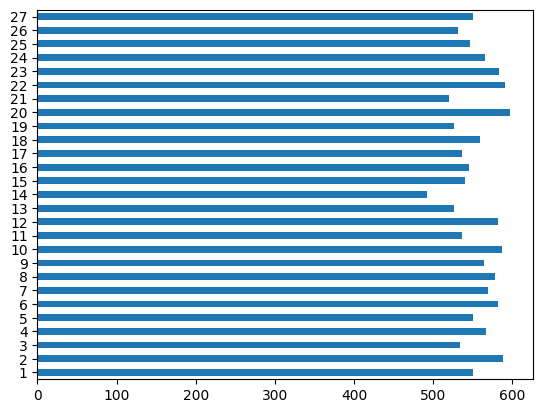

In [23]:
# Horizontla bar graph for number of orders taken on each day of month

df['day_of_month'].value_counts().sort_index().plot(kind='barh')

<Axes: >

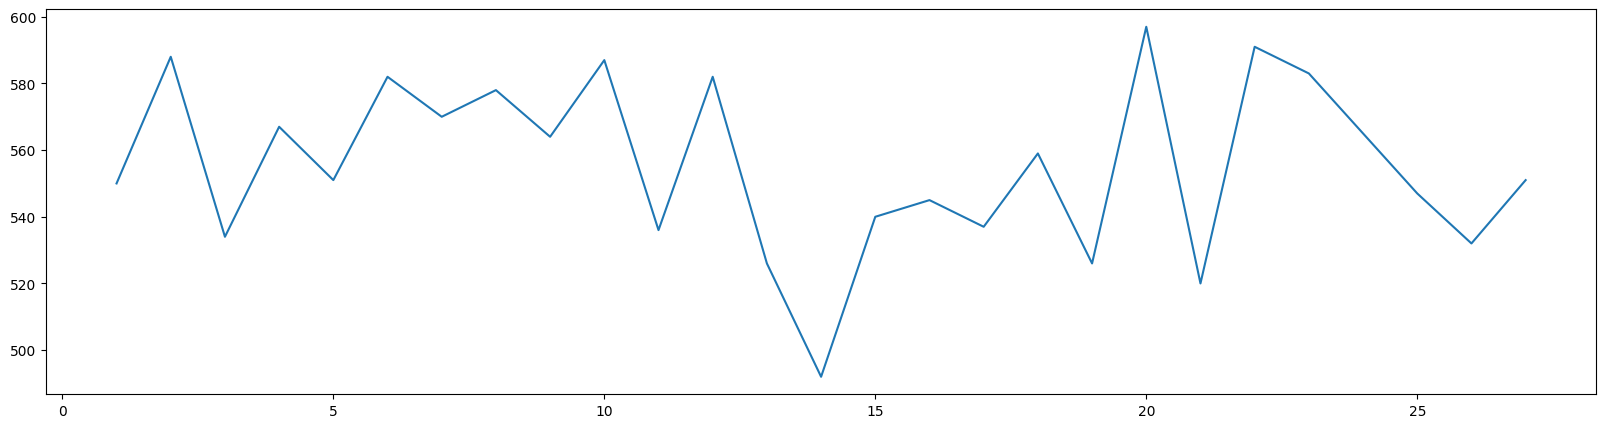

In [24]:
# Line graph for number of orders taken on each day of month

df['day_of_month'].value_counts().sort_index().plot(kind='line',figsize=(20,5))

In [25]:
# Average daily orders

(df['day_of_month'].value_counts().sum())/27

555.5555555555555

In [26]:
# Number of orders taken on each day of week 

df['day_of_week'].value_counts()

Thursday     2280
Wednesday    2259
Monday       2256
Friday       2223
Saturday     2209
Sunday       2191
Tuesday      1582
Name: day_of_week, dtype: int64

**Note** : Number of mondays,wednesdays,thursdays,fridays,saturdays,sundays = 4 while number of tuesdays = 3

<Axes: >

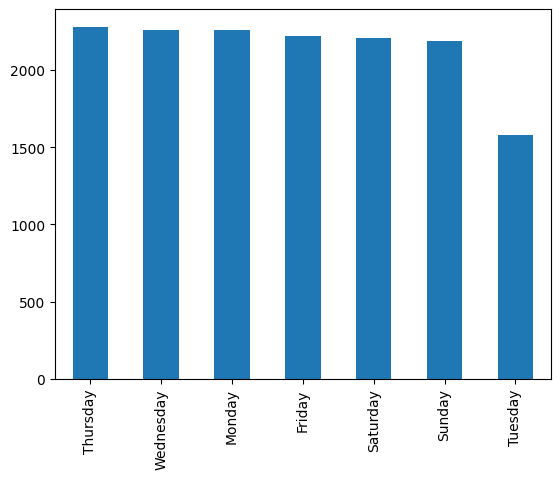

In [27]:
# Bar graph for number of orders taken on each day of week

df['day_of_week'].value_counts().plot(kind='bar')

<Axes: >

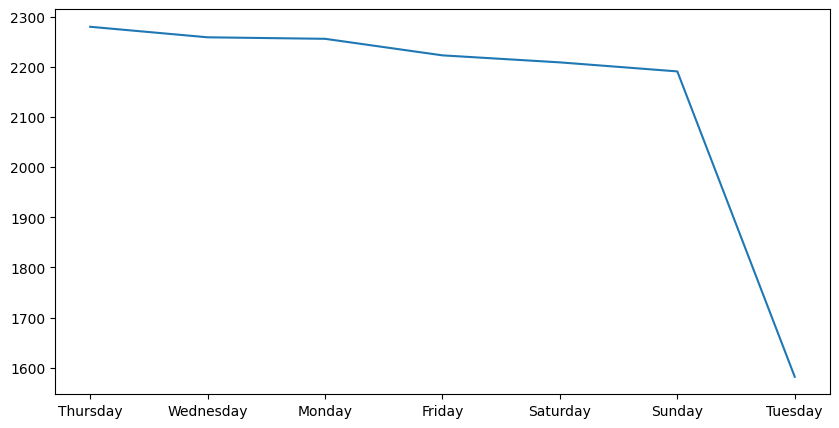

In [28]:
# Line graph for number of orders taken on each day of week

df['day_of_week'].value_counts().plot(kind='line',figsize=(10,5))

In [29]:
# Calculate the delivery time for each order in minutes

df['delivery_time'] = (df['order_delivered_at'] - df['order_placed_at']).dt.total_seconds() / 60

In [30]:
# View first 5 rows of the DataFrame

df.head()

,order_id,order_placed_at,order_delivered_at,day_of_month,day_of_week,delivery_time
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,1,Wednesday,17.140719
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,1,Wednesday,15.598754
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,1,Wednesday,15.104856
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,1,Wednesday,38.533657
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,1,Wednesday,16.176984


In [31]:
# View information about a DataFrame including the index dtype and columns, non-null values and memory usage

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            15000 non-null  int64         
 1   order_placed_at     15000 non-null  datetime64[ns]
 2   order_delivered_at  15000 non-null  datetime64[ns]
 3   day_of_month        15000 non-null  int64         
 4   day_of_week         15000 non-null  object        
 5   delivery_time       15000 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(2), object(1)
memory usage: 703.2+ KB


In [32]:
# View descriptive statistics of the delivery_time

df['delivery_time'].describe()

count    15000.000000
mean        20.499389
std         96.160362
min         15.000010
25%         15.274826
50%         15.797986
75%         17.279661
max       7299.831375
Name: delivery_time, dtype: float64

**Interpretation :** Too much standard deviation.....very far from mean of data 

<Axes: >

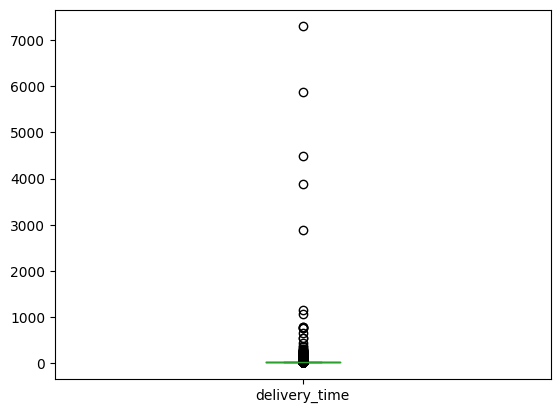

In [33]:
# Boxplot for delievry_time of the DataFrame
# Boxplot is used to give info about data's symmetry, skew, variance, and outliers

df['delivery_time'].plot(kind='box')

**Interpretation :** Outliers exist and pizza delivery times reaches up to 7000 minutes i.e 4.86 days

In [34]:
# Number of outliers

outlier = (df['delivery_time']>40).sum()
print(outlier)

331


In [35]:
# Number of deliveries above 31 minutes including outliers

df[df['delivery_time']>31].shape

(557, 6)

Giving away 557 free pizzas is huge loss for a dominos branch

In [36]:
# Transform delivery time data that exceeds 40 minutes to 40 minutes to remove outliers effect on data

df['delivery_time'] = np.where(df['delivery_time'] > 40, 40, df['delivery_time'])

In [37]:
df['delivery_time'].describe()

count    15000.000000
mean        17.500218
std          4.740531
min         15.000010
25%         15.274826
50%         15.797986
75%         17.279661
max         40.000000
Name: delivery_time, dtype: float64

<Axes: >

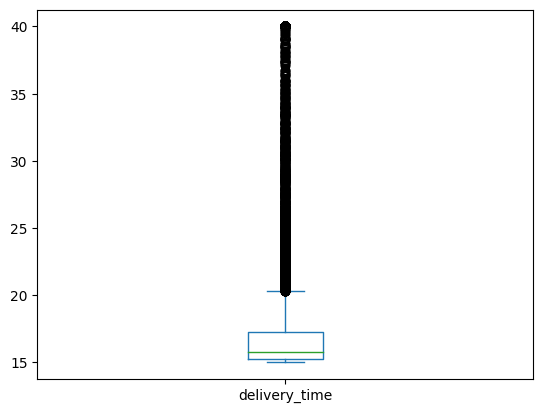

In [38]:
# Boxplot after transformation of data

df['delivery_time'].plot(kind='box')

**Interpretation :** A lot of pizza delivery times are above 31 minutes while the median is considerably good with delivery time of around 15 minutes

In [39]:
# 95th percentile of delivery time including outliers

df['delivery_time'].quantile(0.95)

27.261043996666658

In [40]:
# Removing outliers 

new_df = df[df['delivery_time']<40]

In [41]:
# 95th percentile of delivery time excluding outliers

new_df['delivery_time'].quantile(0.95)

23.596276583333314

**INSIGHTS :**

1. Maximum orders = 597 on 20 March
2. Minimum orders = 492 on 14 March
3. Average daily orders = 555
4. Number of tuesdays = 3 , while number of other days  = 4
5. Average delivery time before transformation of outliers = 20.499389
6. Standard deviation due to outliers = 96.160362 , with maximum valued outlier = 7299.831375
7.   Average delivery time after transformation of outliers = 15.000010
8.   Standard deviation due to outliers = 4.740531 , with maximum valued outlier = 40.000000
9.   Number of free pizzas given by outlet = 557 
10.   95th percentile of delivery time including outliers after transformation = 27.261043996666658
11.   95th percentile of delivery time excluding outliers after transformation = 23.596276583333314






